## Sobre a Base de Dados: Diabetes¹
A base possui dados gerais e resultado exames de pacientes mulheres com pelo menos 21 anos de herança indiana pima.

Atributos
- Número de gravidezes
- Concentração de glicose plasma a 2 horas em um teste oral de tolerância à glicose
- Pressão sanguínea diastólica (mm Hg)
- Espessura da dobra da pele do tríceps
- 2-Horas de insulina sérica (mu U/ml)
- Índice de massa corporal (peso em kg ➗ (altura em m)²)
- Função de pedigree da diabetes
- Idade
- Label (0 or 1)
---
¹ https://www.kaggle.com/uciml/pima-indians-diabetes-database


## Tarefas
- Caso ainda não tenha, cadastre-se no site kaggle.com
- Faça o download do dataset: https://www.kaggle.com/uciml/pima-indians-diabetes-database
---

## Lendo arquivo externo

In [1]:
# Biblioteca para operações em arquivos locais
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes (1).csv


In [2]:
import pandas as pd
df = pd.read_csv('diabetes.csv')
df.head()

,numero_gravidezes,concentracao_glicose,pressao_sanguinea,espessura_triceps,insulina_serica,massa_corporal,funcao_diabetes,idade,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
# Extrai features e rótulos do dataframe
X = df.drop('label', axis=1).get_values()
y = df['label'].get_values()

In [5]:
print(X)
print(y)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0

## Engenharia de Features

### Normalização

In [6]:
# Classe para normalizar os valores entre 0 e 1
from sklearn.preprocessing import MinMaxScaler

# Aplica transformação de MinMax nas features
X2 = MinMaxScaler().fit_transform(X)
X2

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

### Criação de features polinomiais

In [7]:
# Essa classe é utilizada para geração de features usando polinomios (x², x³)
from sklearn.preprocessing import PolynomialFeatures

# Cria features polinomiais
model = PolynomialFeatures(degree=3, include_bias=False)
X2 = model.fit_transform(X)
print('Tamanho da tabela original: (Linhas, Colunas) {}'.format(X.shape))
print('Tamanho da tabela tratada: (Linhas, Colunas) {}'.format(X2.shape))
X2

Tamanho da tabela original: (Linhas, Colunas) (768, 8)
Tamanho da tabela tratada: (Linhas, Colunas) (768, 164)


array([[6.0000000e+00, 1.4800000e+02, 7.2000000e+01, ..., 1.9656450e+01,
        1.5675000e+03, 1.2500000e+05],
       [1.0000000e+00, 8.5000000e+01, 6.6000000e+01, ..., 3.8192310e+00,
        3.3731100e+02, 2.9791000e+04],
       [8.0000000e+00, 1.8300000e+02, 6.4000000e+01, ..., 1.4450688e+01,
        6.8812800e+02, 3.2768000e+04],
       ...,
       [5.0000000e+00, 1.2100000e+02, 7.2000000e+01, ..., 1.8007500e+00,
        2.2050000e+02, 2.7000000e+04],
       [1.0000000e+00, 1.2600000e+02, 6.0000000e+01, ..., 5.7246470e+00,
        7.7094100e+02, 1.0382300e+05],
       [1.0000000e+00, 9.3000000e+01, 7.0000000e+01, ..., 2.2821750e+00,
        1.6663500e+02, 1.2167000e+04]])

In [8]:
# Perceba o número de combinações que foram geradas
model.get_feature_names(df.columns)

['numero_gravidezes',
 'concentracao_glicose',
 'pressao_sanguinea',
 'espessura_triceps',
 'insulina_serica',
 'massa_corporal',
 'funcao_diabetes',
 'idade',
 'numero_gravidezes^2',
 'numero_gravidezes concentracao_glicose',
 'numero_gravidezes pressao_sanguinea',
 'numero_gravidezes espessura_triceps',
 'numero_gravidezes insulina_serica',
 'numero_gravidezes massa_corporal',
 'numero_gravidezes funcao_diabetes',
 'numero_gravidezes idade',
 'concentracao_glicose^2',
 'concentracao_glicose pressao_sanguinea',
 'concentracao_glicose espessura_triceps',
 'concentracao_glicose insulina_serica',
 'concentracao_glicose massa_corporal',
 'concentracao_glicose funcao_diabetes',
 'concentracao_glicose idade',
 'pressao_sanguinea^2',
 'pressao_sanguinea espessura_triceps',
 'pressao_sanguinea insulina_serica',
 'pressao_sanguinea massa_corporal',
 'pressao_sanguinea funcao_diabetes',
 'pressao_sanguinea idade',
 'espessura_triceps^2',
 'espessura_triceps insulina_serica',
 'espessura_triceps

### Exemplo simplificado do uso de features polinomiais

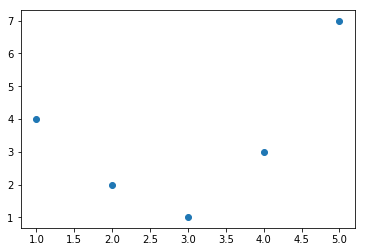

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y);

In [11]:
# Nesse nosso conjunto de dados sintético, vamos fazer um experimento simples

# Modelo de regreção
from sklearn.linear_model import LinearRegression

# Preparando dados
X = x.reshape(-1, 1)

# Instanciação e treinamento do modelo
model = LinearRegression().fit(X, y)

# Prediz os valores
yfit = model.predict(X)

# Gráfico
plt.scatter(x, y)
plt.plot(x, yfit);

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [0]:
# Essa classe é utilizada para geração de features usando polinomios (x², x³)
from sklearn.preprocessing import PolynomialFeatures

# Cria instância para tratamento das features
poly = PolynomialFeatures(degree=3, include_bias=False)

# Aplica a transformação e cria as features polinomiais
X2 = poly.fit_transform(X)
print(X2)

In [0]:
# Retreinando o Modelo
model = LinearRegression().fit(X2, y)

# Prediz os valores
yfit = model.predict(X2)

# Gráfico
plt.scatter(x, y)
plt.plot(x, yfit);

### Exemplo de exploração das features

In [0]:
df.describe()

,numero_gravidezes,concentracao_glicose,pressao_sanguinea,espessura_triceps,insulina_serica,massa_corporal,funcao_diabetes,idade,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Será que todos esses valores fazem sentido?

Por exemplo, com base nas informações fornecidas para a pressão arterial em adultos no wikipedia, qualquer pressão arterial abaixo de 60 é considerada hipotensão que precisa ser tratada imediatamente, pois indica que não há sangue suficiente para atingir os órgãos da pessoa, a pessoa é considerada em "choque". Assumindo que estas são mulheres saudáveis e normais que atualmente não sofrem de hipotensão ou estão no pronto-socorro sendo tratadas de hipotensão e estão acordadas no momento da coleta de dados, os valores de 0 são claramente inválidos.

In [0]:
print(df[df['pressao_sanguinea'] == 0].shape[0])
print(df[df['pressao_sanguinea'] == 0].index.tolist())
print(df[df['pressao_sanguinea'] == 0].groupby('label')['idade'].count())

35
[7, 15, 49, 60, 78, 81, 172, 193, 222, 261, 266, 269, 300, 332, 336, 347, 357, 426, 430, 435, 453, 468, 484, 494, 522, 533, 535, 589, 601, 604, 619, 643, 697, 703, 706]
label
0    19
1    16
Name: idade, dtype: int64


Algumas possíveis soluções são:
- Remover os registros com esse erro
- Ignorar a coluna
- Inserir a média dos valores nos resultados faltantes